In [ ]:
#Prediction model for profit of 50_startups data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
import scipy.stats as st

In [2]:
startup_data=pd.read_csv("A:/Data Science/assignments/Multiple Linear regression/50_Startups.csv")

In [3]:
startup_data.shape
print("No of rows {} in the data and {} coloumns.".format(startup_data.shape[0],startup_data.shape[1]))

No of rows 50 in the data and 5 coloumns.


In [4]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup_data2=startup_data.drop(['State'],axis=1)

In [6]:
startup_data2

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


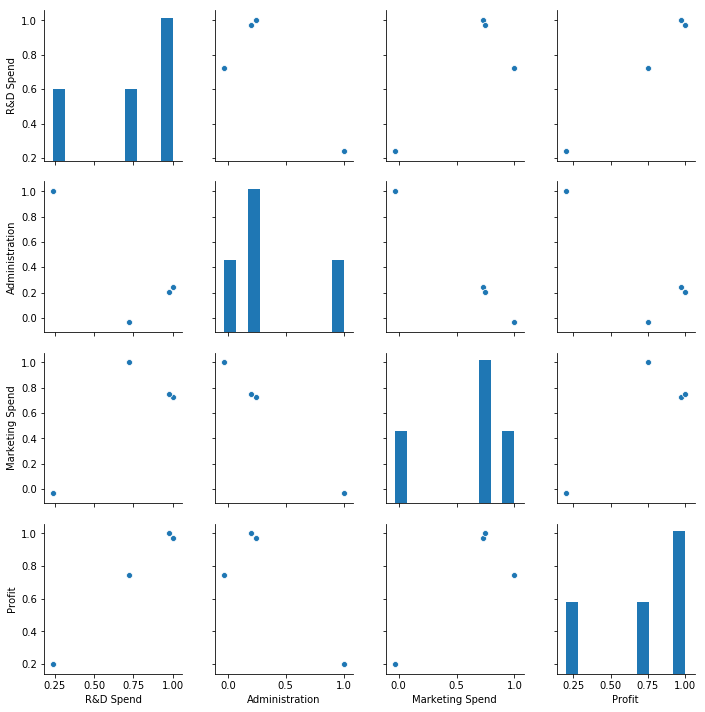

In [8]:
sns.pairplot(startup_data.corr())

In [9]:
startup_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [28]:
startup_data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [47]:
mean_state_group=startup_data.groupby('State').mean()

In [48]:
mean_state_group

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [44]:
mean_state_group['Profit']

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

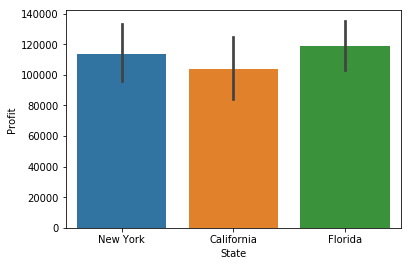

In [46]:
sns.barplot(startup_data['State'],startup_data['Profit'])

In [ ]:
startup_data.groupby()

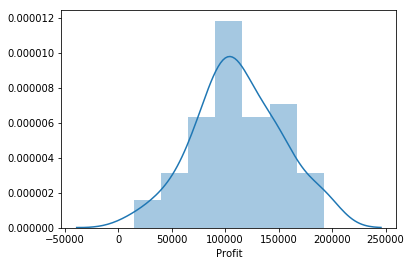

In [50]:
sns.distplot(startup_data['Profit'])

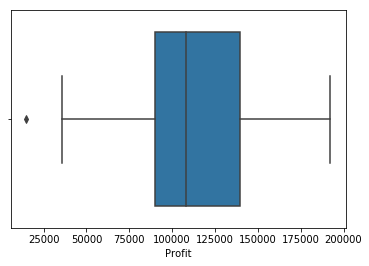

In [66]:
sns.boxplot(startup_data.Profit)

In [ ]:
#Findings
#No missing values
#Profit column has an outlier
#Florida is doing better than Newyork and Calfornia
#RD has strong correlation with profit

In [11]:
scaled_data=StandardScaler()
scaled_data1=scaled_data.fit_transform(startup_data2)
startup_data_scaled=pd.DataFrame(scaled_data1,columns=('R&D Spend','Administration','Marketing Spend','Profit'))
startup_data_scaled


,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740
5,1.279800,-0.776239,1.254210,1.127250
6,1.340066,0.932147,-0.688150,1.105481
7,1.245057,0.871980,0.932186,1.096210
8,1.030369,0.986952,0.830887,1.007470
9,1.091819,-0.456640,0.776107,0.946022


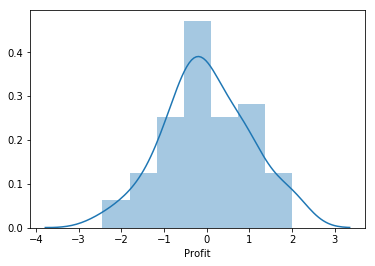

In [114]:
sns.distplot(startup_data_scaled.Profit)

In [12]:
startup_data_scaled['State']=startup_data.State
startup_data_scaled

,R&D Spend,Administration,Marketing Spend,Profit,State
0,2.016411,0.560753,2.153943,2.011203,New York
1,1.955860,1.082807,1.923600,1.999430,California
2,1.754364,-0.728257,1.626528,1.980842,Florida
3,1.554784,-0.096365,1.422210,1.776627,New York
4,1.504937,-1.079919,1.281528,1.357740,Florida
5,1.279800,-0.776239,1.254210,1.127250,New York
6,1.340066,0.932147,-0.688150,1.105481,California
7,1.245057,0.871980,0.932186,1.096210,Florida
8,1.030369,0.986952,0.830887,1.007470,New York
9,1.091819,-0.456640,0.776107,0.946022,California


In [13]:
startup_States=pd.get_dummies(startup_data_scaled.State)
startup_States=startup_States.astype(int)

In [14]:
startup_data_scaled=pd.concat([startup_data_scaled,startup_States],axis=1)

In [15]:
startup_data_scaled=startup_data_scaled.drop(['State'],axis=1)

In [16]:
startup_data_scaled.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
California           int32
Florida              int32
New York             int32
dtype: object

In [17]:
startup_data_scaled.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend','New York':'NewYork'},inplace=True)

In [18]:
startup_data_scaled

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida,NewYork
0,2.016411,0.560753,2.153943,2.011203,0,0,1
1,1.955860,1.082807,1.923600,1.999430,1,0,0
2,1.754364,-0.728257,1.626528,1.980842,0,1,0
3,1.554784,-0.096365,1.422210,1.776627,0,0,1
4,1.504937,-1.079919,1.281528,1.357740,0,1,0
5,1.279800,-0.776239,1.254210,1.127250,0,0,1
6,1.340066,0.932147,-0.688150,1.105481,1,0,0
7,1.245057,0.871980,0.932186,1.096210,0,1,0
8,1.030369,0.986952,0.830887,1.007470,0,0,1
9,1.091819,-0.456640,0.776107,0.946022,1,0,0


# Regression models

In [19]:
startup_data_scaled.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
Profit             float64
California           int32
Florida              int32
NewYork              int32
dtype: object

In [72]:
x=startup_data_Scalstates.drop(['Profit'],axis=1)
y=startup_data_Scalstates.Profit

In [21]:
#Scaled data+Addded dummy variable
ols_model_V1=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+California+Florida+NewYork',data=startup_data_scaled).fit()

In [22]:
ols_model_V1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        18:34:54   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.507e-05      0.025      0.002      0.998      -0.051       0.051
RD_Spend            0.9179      0.053     17.369      0.000       0.811       1.024
Administration     -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing_Spend     0.0819      0.052      1.574      0.123      -0.023       0.187
California         -0.0013      0.048     -0.027      0.979      -0.099       0.096
Florida             0.0037      0.050      0.074      0.941      -0.097       0.104
NewYork            -0.0023      0.048     -0.049      0.961      -0.099       0.094
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.75e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
startup_data_Scalstates=startup_data_scaled.iloc[:,0:4]
startup_data_Scalstates['State']=startup_data.State
startup_data_Scalstates

,RD_Spend,Administration,Marketing_Spend,Profit,State
0,2.016411,0.560753,2.153943,2.011203,New York
1,1.955860,1.082807,1.923600,1.999430,California
2,1.754364,-0.728257,1.626528,1.980842,Florida
3,1.554784,-0.096365,1.422210,1.776627,New York
4,1.504937,-1.079919,1.281528,1.357740,Florida
5,1.279800,-0.776239,1.254210,1.127250,New York
6,1.340066,0.932147,-0.688150,1.105481,California
7,1.245057,0.871980,0.932186,1.096210,Florida
8,1.030369,0.986952,0.830887,1.007470,New York
9,1.091819,-0.456640,0.776107,0.946022,California


In [24]:
#Scaled data without adding dummy variables
ols_model_V2=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=startup_data_Scalstates).fit()

In [25]:
ols_model_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        18:35:03   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0012      0.058     -0.021      0.983      -0.118       0.116
State[T.Florida]      0.0050      0.084      0.059      0.953      -0.165       0.175
State[T.New York]    -0.0010      0.082     -0.013      0.990      -0.166       0.163
RD_Spend              0.9179      0.053     17.369      0.000       0.811       1.024
Administration       -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing_Spend       0.0819      0.052      1.574      0.123      -0.023       0.187
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Scaled data and exculded state
ols_model_V3=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup_data_Scalstates).fit()

In [27]:
ols_model_V3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           4.53e-30
Time:                        18:35:06   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.204e-16      0.033  -1.59e-14      1.000      -0.066       0.066
RD_Spend            0.9176      0.051     17.846      0.000       0.814       1.021
Administration     -0.0186      0.035     -0.526      0.602      -0.090       0.053
Marketing_Spend     0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Scaled data and exculded state
ols_model_V4=smf.ols('Profit~RD_Spend+Marketing_Spend',data=startup_data_Scalstates).fit()

In [29]:
ols_model_V4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.16e-31
Time:                        18:35:11   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RD_Spend            0.9072      0.047     19.266      0.000       0.812       1.002
Marketing_Spend     0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

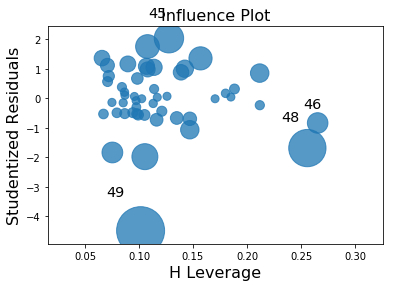

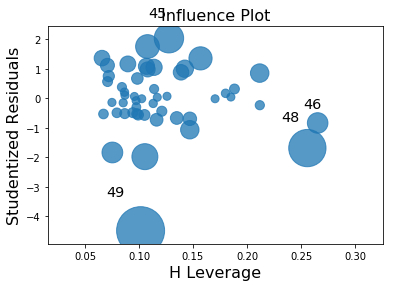

In [30]:
#influential values 
sm.graphics.influence_plot(ols_model_V1)

In [31]:
startup_data_scaled=startup_data_scaled.drop(startup_data_scaled.index[[46,48,49]],axis=0)
startup_data_Scalstates=startup_data_Scalstates.drop(startup_data_Scalstates.index[[46,48,49]],axis=0)

In [60]:
#Preparing model after removing data points
ols_model_N1=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=startup_data_Scalstates).fit()

In [61]:
ols_model_N1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     204.7
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           7.33e-28
Time:                        18:44:24   Log-Likelihood:                 15.341
No. Observations:                  47   AIC:                            -18.68
Df Residuals:                      41   BIC:                            -7.581
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0450      0.047      0.958      0.344      -0.050       0.140
State[T.Florida]     -0.0153      0.068     -0.224      0.824      -0.154       0.123
State[T.New York]    -0.0156      0.067     -0.233      0.817      -0.150       0.119
RD_Spend              0.8708      0.048     18.275      0.000       0.775       0.967
Administration       -0.0365      0.032     -1.157      0.254      -0.100       0.027
Marketing_Spend       0.0770      0.046      1.669      0.103      -0.016       0.170
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.531
Skew:                           0.062   Prob(JB):                        0.767
Kurtosis:                       2.494   Cond. No.                         4.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
ols_model_N2=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup_data_scaled).fit()

In [35]:
ols_model_N2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.12e-30
Time:                        18:35:25   Log-Likelihood:                 15.301
No. Observations:                  47   AIC:                            -22.60
Df Residuals:                      43   BIC:                            -15.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0349      0.027      1.302      0.200      -0.019       0.089
RD_Spend            0.8703      0.047     18.704      0.000       0.776       0.964
Administration     -0.0370      0.031     -1.202      0.236      -0.099       0.025
Marketing_Spend     0.0761      0.045      1.696      0.097      -0.014       0.167
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# calculating VIF's values of independent variables
model_RD=smf.ols('RD_Spend~Administration+Marketing_Spend+State',data=startup_data_Scalstates).fit().rsquared
vif_RD=1/(1-model_RD)#2.712


In [37]:
model_Adm=smf.ols('Administration~RD_Spend+Marketing_Spend+State',data=startup_data_Scalstates).fit().rsquared
vif_Adm=1/(1-model_Adm)#1.237


In [38]:
model_Market=smf.ols('Marketing_Spend~RD_Spend+Administration+State',data=startup_data_Scalstates).fit().rsquared
vif_Market=1/(1-model_Market)#2.709

In [ ]:
#VIF factors is less than 10 hence considering all the variables

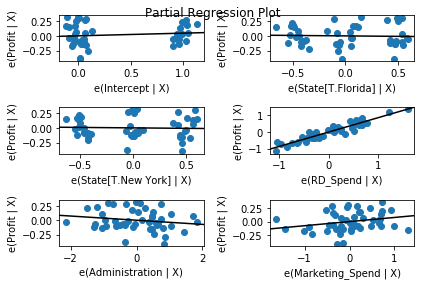

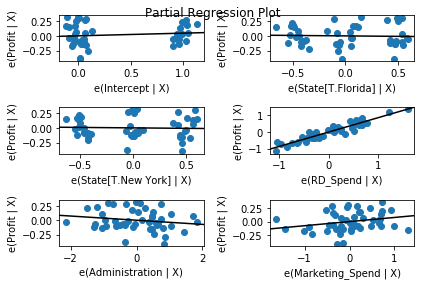

In [39]:
sm.graphics.plot_partregress_grid(ols_model_N1)

In [40]:
#Removing state as state is showing no signifinace
ols_model_final=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup_data_Scalstates).fit()

In [41]:
ols_model_final.params

Intercept          0.034942
RD_Spend           0.870313
Administration    -0.036976
Marketing_Spend    0.076115
dtype: float64

In [42]:
ols_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.12e-30
Time:                        18:35:38   Log-Likelihood:                 15.301
No. Observations:                  47   AIC:                            -22.60
Df Residuals:                      43   BIC:                            -15.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0349      0.027      1.302      0.200      -0.019       0.089
RD_Spend            0.8703      0.047     18.704      0.000       0.776       0.964
Administration     -0.0370      0.031     -1.202      0.236      -0.099       0.025
Marketing_Spend     0.0761      0.045      1.696      0.097      -0.014       0.167
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
pred_y=ols_model_final.predict(x)

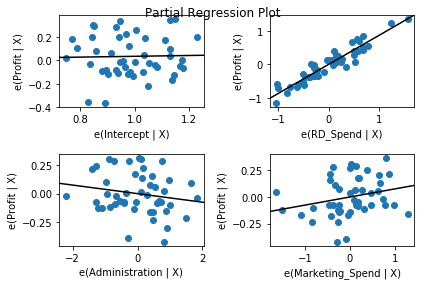

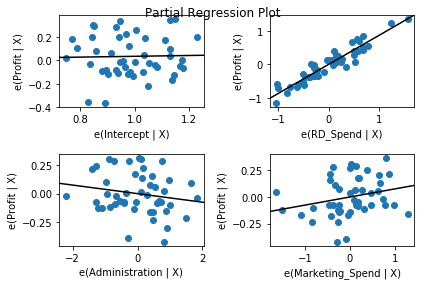

In [43]:
sm.graphics.plot_partregress_grid(ols_model_final)

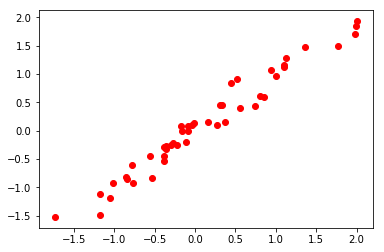

In [82]:
#scatter Plots Observed values VS Fitted values
plt.scatter(x=startup_data_Scalstates.Profit,y=pred_y,c='r')

In [75]:
pred_y

0     1.933065
1     1.843531
2     1.712519
3     1.499905
4     1.482183
5     1.272935
6     1.114373
7     1.157243
8     0.958435
9     1.061125
10    0.600617
11    0.614855
12    0.437154
13    0.392192
14    0.901878
15    0.846620
16    0.150323
17    0.449259
18    0.442521
19    0.102579
20    0.148511
21    0.136889
22    0.096281
23   -0.003867
24    0.083693
25   -0.208732
26   -0.013055
27    0.084718
28   -0.252077
29   -0.228063
30   -0.257442
31   -0.325114
32   -0.276776
33   -0.287517
34   -0.536440
35   -0.450805
36   -0.841872
37   -0.448365
38   -0.931917
39   -0.610033
40   -0.846605
41   -0.823231
42   -0.930325
43   -1.198431
44   -1.111730
45   -1.493089
47   -1.528472
dtype: float64

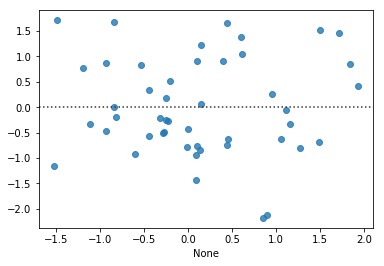

In [85]:
sns.residplot(pred_y,ols_model_final.resid_pearson)

(array([ 2.,  1.,  1., 10.,  9.,  5.,  5.,  6.,  2.,  6.]),
 array([-2.17812589, -1.78897204, -1.39981819, -1.01066434, -0.62151049,
        -0.23235664,  0.15679721,  0.54595105,  0.9351049 ,  1.32425875,
         1.7134126 ]),
 <a list of 10 Patch objects>)

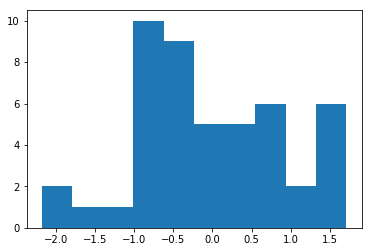

In [86]:
# Normality plot for residuals #
plt.hist(ols_model_final.resid_pearson)

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([-2.17812589e+00, -2.11216828e+00, -1.42467607e+00, -1.16134464e+00,
         -9.32899985e-01, -9.14499787e-01, -8.45317207e-01, -7.97488165e-01,
         -7.89967400e-01, -7.54836661e-01, -7.41213942e-01, -6.81204555e-01,
         -6.30073787e-01, -6.26714184e-01, -5.72531868e-01, -5.160

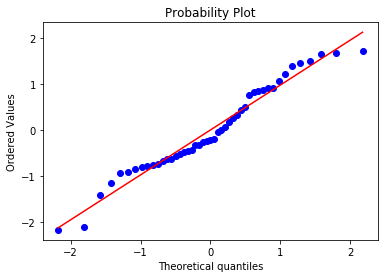

In [88]:
#QQ plot for residuals 
st.probplot(ols_model_final.resid_pearson,dist='norm',plot=pylab)

In [ ]:
Prediction_models=pd.DataFrame({'Models':['ols_model_V1','ols_model_V2','ols_model_V3','ols_model_N1','ols_model_final'],
                                 'R squared':[ols_model_V1.rsquared,ols_model_V2.rsquared,ols_model_V3.rsquared,ols_model_N1.rsquared,ols_model_final.rsquared]})

In [89]:
Prediction_models

,Models,R squared
0,ols_model_V1,0.950752
1,ols_model_V2,0.950752
2,ols_model_V3,0.950746
3,ols_model_N1,0.961478
4,ols_model_final,0.961413
